# GS Quantify 2019
## Rishabh Singhal
## Overview

### In this workbook, I have used Sklearn's TFIDF vectorizer and MiniBatchKmeans to perform some simple document clustering. After which I have ploted the clusters using PCA and TSNE

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

In [10]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
%matplotlib inline

## Importing the training, public and private dataset

In [3]:
public = [line.strip() for line in open("public_test_set.txt", "r").readlines()]
private = [line.strip() for line in open("private_test_set.txt", "r").readlines()]
train = [line.strip() for line in open("train_set.txt", "r").readlines()]

## Converting the data into dataframe

In [4]:
train = pd.DataFrame(train)
train.head()

,0
0,L0~gs.api.log.57_13-09-2019_06:59 34703 INFO g...
1,L1~gs.compute.log.30_2019-09-12_07:04:00 39946...
2,L2~gs.compute.log.77_2019-09-11_10:53:00 94359...
3,L3~gs.compute.log.38_2019-09-01_13:31:00 80828...
4,"L4~gs.api.log.38_Sep 01, 2019_13:20:00 44944 I..."


In [5]:
public = pd.DataFrame(public)
public.head()

,0
0,"L0~gs.api.log.69_Sep 14, 2019_13:20:00 58233 I..."
1,L1~gs.compute.log.56.10-09-2019_04:18 PM 60109...
2,L2~gs.api.log.84_11-09-2019_09:30 80226 INFO g...
3,"L3~gs.compute.log.94.Sep 07, 2019_13:04 57889 ..."
4,"L4~gs.api.log.40_Sep 11, 2019_23:18:00 61822 I..."


In [6]:
private = pd.DataFrame(private)
private.head()

,0
0,"L0~gs.api.log.60.Sep 09, 2019_10:45 17162 INFO..."
1,L1~gs.api.log.14.2019-09-02_07:57 AM 60858 INF...
2,L2~gs.api.compute.log.65.11-09-2019_04:57 AM 7...
3,L3~gs.compute.log.82.07-09-2019_05:17 PM 5534 ...
4,L4~gs.api.log.15.2019-09-14_16:27 39946 INFO g...


In [7]:
pr_des = private[0].values
pu_des = public[0].values
tr_des = train[0].values

## Extracting keywords
### Here I used the TfidfVectorizer for extracting keywords.

In [11]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
total_des = np.append(tr_des,pu_des)
total_des = np.append(total_des,pr_des)
vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(total_des)

In [12]:
X.shape

(89427, 93785)

In [13]:
X_train = X[:len(train)]
X_public = X[len(train):len(train)+len(public)]
X_private = X[len(train)+len(public):]

In [14]:
print(X_train.shape)
print(X_public.shape)
print(X_private.shape)

(87675, 93785)
(702, 93785)
(1050, 93785)


## Finding Optimal Clusters

### Plotting the SSE for a range of cluster sizes.

In [15]:
from sklearn.cluster import KMeans
wcss = []
for i in range(4,16):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=500,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

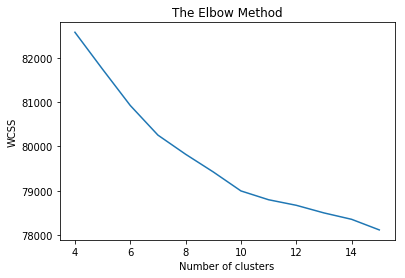

In [21]:
plt.plot(range(4,16),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [22]:
wcss

[82585.08163074721,
 81747.28736206533,
 80928.16054504452,
 80257.30241603788,
 79824.19490295237,
 79423.92554329295,
 78994.19141493317,
 78794.55536773891,
 78669.01411285266,
 78496.62568906572,
 78351.67433086286,
 78111.84429433965]

In [44]:
d = kmeans.labels_

## Predicting the Lables.

In [45]:
sub_public = kmeans.predict(X_public)
sub_private = kmeans.predict(X_private)

In [46]:
sub_public = list(sub_public)
sub_private = list(sub_private)

In [47]:
g_public = []
for i in range(0,len(sub_public)):
    o = 'C'
    o = o+str(sub_public[i])
    g_public.append(o)
g_public[:10]

['C0', 'C9', 'C6', 'C1', 'C0', 'C1', 'C6', 'C1', 'C9', 'C9']

In [48]:
g_private = []
for i in range(0,len(sub_private)):
    o = 'C'
    o = o+str(sub_private[i])
    g_private.append(o)
g_private[:10]

['C5', 'C10', 'C13', 'C3', 'C8', 'C4', 'C7', 'C3', 'C10', 'C3']

In [49]:
submit = pd.read_csv('sample_public_test.csv')

In [50]:
submit.head()

,LineNumber,Class
0,L0,C3
1,L1,C15
2,L2,C6
3,L3,C15
4,L4,C3


In [51]:
len(submit)

702

In [52]:
submit['Class'] = g_public[:]

In [53]:
submit.to_csv('submit_public_test.csv',index=None)

In [54]:
submit = pd.read_csv('sample_private_test.csv')

In [55]:
submit.head()

,LineNumber,Class
0,L72,C3
1,L87,C7
2,L105,C8
3,L108,C7
4,L146,C12


In [56]:
len(submit)

1050

In [57]:
submit['Class'] = g_private[:]
submit.head()

,LineNumber,Class
0,L72,C5
1,L87,C10
2,L105,C13
3,L108,C3
4,L146,C8


In [58]:
submit.to_csv('submit_private_test.csv',index=None)